In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
file = "cleaned_skills_in_progress.csv"
project_df = pd.read_csv(file)
project_df

,Unnamed: 0,C#,R,R,r,r,AGILE,AWS,AWs,AZURE,...,postgresql,python,ql,qlikview,r Cloud,r cloud,tableau,tate,unix,url
0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CA,0.0,https://www.indeed.com/viewjob?jk=fd83355c2b23...
1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NJ,0.0,https://www.dice.com/jobs/detail/Data-Scientis...
2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NY,0.0,https://www.dice.com/jobs/detail/Data-Scientis...
3,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NY,0.0,https://www.indeed.com/viewjob?jk=c6db96b37f8a...
4,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,CA,0.0,https://www.dice.com/jobs/detail/Sr.-Data-Scie...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8737,8737,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AZ,0.0,https://www.careerbuilder.com/job/J3M7GJ67MHP8...
8738,8738,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MA,0.0,https://www.careerbuilder.com/job/J3W24867TTZV...
8739,8739,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CA,0.0,https://job-openings.monster.com/senior-data-s...
8740,8740,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VA,0.0,https://job-openings.monster.com/multi-source-...


In [3]:
#adding Machine learning to skills search of job description

import re


skills = ['Machine', 'ML']

rx = '(?i)(?P<skills>{})'.format('|'.join(re.escape(skills) for skills in skills))

matches = project_df['job_description'].str.extractall(rx)

dummies = pd.get_dummies(matches).max(level=0)
dummies

result = project_df.join(dummies, how='left')

result.head()




,Unnamed: 0,C#,R,R,r,r,AGILE,AWS,AWs,AZURE,...,tate,unix,url,skills_MACHINE,skills_ML,skills_Machine,skills_Ml,skills_mL,skills_machine,skills_ml
0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,CA,0.0,https://www.indeed.com/viewjob?jk=fd83355c2b23...,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NJ,0.0,https://www.dice.com/jobs/detail/Data-Scientis...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NY,0.0,https://www.dice.com/jobs/detail/Data-Scientis...,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NY,0.0,https://www.indeed.com/viewjob?jk=c6db96b37f8a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,CA,0.0,https://www.dice.com/jobs/detail/Sr.-Data-Scie...,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
list(result.columns)

['Unnamed: 0',
 ' C#',
 ' R',
 ' R ',
 ' r',
 ' r ',
 'AGILE',
 'AWS',
 'AWs',
 'AZURE',
 'Agile',
 'Azure',
 'Data Studio',
 'Degree',
 'DEGREE',
 'GoLang',
 'Golang',
 'HADOOP',
 'HIVE',
 'Hadoop',
 'Hive',
 'INSIGHT',
 'INsight',
 'Insight',
 'JAVA',
 'Java',
 'Jupyter',
 'KAFKA',
 'KafKa',
 'Kafka',
 'MATLAB',
 'ML',
 'MatLab',
 'MatPlotLib',
 'Matlab',
 'MatplotLib',
 'Matplotlib',
 'Ml',
 'NOSQL',
 'NoSQL',
 'NoSql',
 'Nosql',
 'PANDAS',
 'PERL',
 'PIG',
 'POSTGRESQL',
 'Pandas',
 'Perl',
 'Pig',
 'PostGreSQL',
 'PostgreSQL',
 'PostgreSql',
 'PostgresQL',
 'Postgresql',
 'PowerBI',
 'PYTHON',
 'Python',
 'PowerBi',
 'QlikView',
 'Qlikview',
 'SCALA',
 'SPARK',
 'SQL',
 'ScIkit-learn',
 'Scala',
 'SciKit-Learn',
 'SciKit-learn',
 'Scikit-Learn',
 'Scikit-learn',
 'Spark',
 'Sql',
 'Tableau',
 'UNIX',
 'Unix',
 'Unnamed: 0.1',
 'Unnamed: 0.1.1',
 'Unnamed: 0.1.1.1',
 'afka',
 'agile',
 'alary_offered',
 'aws',
 'azure',
 'cala',
 'category',
 'cikit-learn',
 'city',
 'company_name'

In [5]:
# create function to add new column for r

def f(row):
    if row[' R'] + row[' R '] + row[' r'] + row[' r '] >= 1:
        val = 1
    else:
        val = 0
    return val

result['cleaned R'] = result.apply(f, axis=1)


In [6]:
# create functions to account for duplicate skills findings for 2-6 columns

def f2(row):
    if row[x] + row[y] >= 1:
        val = 1
    else:
        val = 0
    return val



def f3(row):
    if row[x] + row[y] + row[z]  >= 1:
        val = 1
    else:
        val = 0
    return val

def f4(row):
    if row[w] + row[x] + row[y] + row[z]  >= 1:
        val = 1
    else:
        val = 0
    return val

def f5(row):
    if row[v] + row[w] + row[x] + row[y]+ row[z]  >= 1:
        val = 1
    else:
        val = 0
    return val


def f6(row):
    if row [u] + row[v] + row[w] + row[x] + row[y] + row[z]  >= 1:
        val = 1
    else:
        val = 0
    return val

def f7(row):
    if row[t] + row [u] + row[v] + row[w] + row[x] + row[y] + row[z]  >= 1:
        val = 1
    else:
        val = 0
    return val


In [7]:
#set variables for column names

x = 'AGILE'
y = 'Agile'
z = 'agile'

# apply function
result['cleaned Agile'] = result.apply(f3, axis=1)

In [8]:
x = 'AWS'
y = 'AWs'
z = 'aws'
#apply function
result['cleaned AWS'] = result.apply(f3, axis=1)

In [9]:
#set variables for column names
x = 'AZURE'
y = 'Azure'
z = 'azure'

result['cleaned Azure'] = result.apply(f3, axis=1)


In [10]:


x = 'Degree'
y = 'DEGREE'
z = 'degree'

result['cleaned Degree'] = result.apply(f3, axis=1)


In [11]:
#set variables for column names

x = 'GoLang'
y = 'Golang'
z = 'golang'
#apply function
result['cleaned GOLang'] = result.apply(f3, axis=1)


In [12]:

x = 'HADOOP'
y = 'Hadoop'
z = 'hadoop'
result['cleaned Hadoop'] = result.apply(f3, axis=1)


In [13]:
#set variables for column names

x = 'HIVE'
y = 'Hive'
z = 'hive'
#apply function
result['cleaned Hive'] = result.apply(f3, axis=1)


In [14]:
#list(project_df.columns)

In [15]:
#set variables for column names
x = 'INsight'
y = 'Insight'
z = 'INSIGHT'
w = 'nsight'
#apply function
result['Cleaned Insight'] = result.apply(f4, axis=1)


In [16]:
x = 'JAVA'
y = 'Java'
z = 'java'
#apply function
result['cleaned JAVA'] = result.apply(f3, axis=1)

In [17]:
x = 'Jupyter'
y = 'jupyter'

#set variables for column names
result['cleaned JUPYTER'] = result.apply(f2, axis=1)

In [18]:
#set variables for column names

x = 'KAFKA'
y = 'KafKa'
z = 'Kafka' 
w = 'afka'
#apply function
result['cleaned KAFKA'] = result.apply(f4, axis=1)

In [19]:
x = 'MATLAB'
y = 'MatLab'
z = 'matlab'

#apply function
result['cleaned MATLAB'] = result.apply(f3, axis=1)

In [20]:
w = 'MatPlotLib'
x = 'MatplotLib'
y = 'Matplotlib'
z = 'matplotlib'

result['cleaned MATPLOTLIB'] = result.apply(f4, axis=1)

In [21]:
#set variables for column names

v = 'NOSQL'
w = 'NoSQL'
x =  'NoSql'
y =  'Nosql'
z = 'noSQL'



result['cleaned NOSQL'] = result.apply(f5, axis=1)

In [22]:
x = 'PANDAS'
y = 'Pandas'
z = 'pandas'

#apply function
result['cleaned PANDAS'] = result.apply(f3, axis=1)

In [23]:
x = 'PERL'
y = 'Perl'
z = 'perl'

#apply function
result['cleaned PERL'] = result.apply(f3, axis=1)

In [24]:
x = 'PIG'
y = 'Pig'
z = 'pig'

#apply function
result['cleaned PIG'] = result.apply(f3, axis=1)

In [25]:
#set variables for column names

u = 'PostGreSQL'
v = 'PostgreSQL'
w = 'PostgreSql'
x = 'PostgresQL'
y = 'Postgresql'
z = 'postgresql'

result['cleaned POSTGRESQL'] = result.apply(f6, axis=1)


In [26]:
x = 'PowerBI'
y =  'PowerBi'

result['cleaned POWERBI'] = result.apply(f2, axis=1)


In [27]:
x = 'PYTHON'
y = 'Python'
z = 'python'

#apply function
result['cleaned PYTHON'] = result.apply(f3, axis=1)

In [28]:
x ='QlikView'
y ='Qlikview'
z = 'qlikview'

#apply function
result['cleaned QLIKVIEW'] = result.apply(f3, axis=1)

In [29]:
x ='r Cloud'
y = 'r cloud'

result['cleaned R CLOUD'] = result.apply(f2, axis=1)

In [30]:
x = 'SCALA'
y =  'Scala'
z = 'cala'

result['cleaned SCALA'] = result.apply(f3, axis=1)


In [31]:
#set variables for column names

x = 'SPARK'
y =  'Spark'
z = 'park'

result['cleaned SPARK'] = result.apply(f3, axis=1)


In [32]:
x = 'SQL'
y =  'Sql'

result['cleaned SQL'] = result.apply(f2, axis=1)


In [33]:
#list(project_df.columns)

In [34]:
#set variables for column names

u = 'cikit-learn'
v = 'ScIkit-learn'
x = 'SciKit-Learn'
y = 'SciKit-learn'
w = 'Scikit-Learn'
z = 'Scikit-learn'

result['cleaned SCIKITLEARN'] = result.apply(f6, axis=1)


In [35]:
x= 'Tableau'
y= 'tableau'

result['TABLEAU'] = result.apply(f2, axis=1)

In [36]:
x = 'UNIX'
y =  'Unix'
z = 'unix'

result['cleaned UNIX'] = result.apply(f3, axis=1)


In [37]:
t='skills_MACHINE'
u ='skills_ML'
v ='skills_Machine'
w = 'skills_Ml'
x ='skills_mL'
y = 'skills_machine'
z = 'skills_ml'

result['cleaned MACHINE LEARNING'] = result.apply(f7, axis=1)


In [38]:
result.head()

,Unnamed: 0,C#,R,R,r,r,AGILE,AWS,AWs,AZURE,...,cleaned PYTHON,cleaned QLIKVIEW,cleaned R CLOUD,cleaned SCALA,cleaned SPARK,cleaned SQL,cleaned SCIKITLEARN,TABLEAU,cleaned UNIX,cleaned MACHINE LEARNING
0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,1,0,1,0,1
1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,1
2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,1
3,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,1,0,1,0,0
4,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,1,0,0,1,1


In [39]:
list(result.columns)

['Unnamed: 0',
 ' C#',
 ' R',
 ' R ',
 ' r',
 ' r ',
 'AGILE',
 'AWS',
 'AWs',
 'AZURE',
 'Agile',
 'Azure',
 'Data Studio',
 'Degree',
 'DEGREE',
 'GoLang',
 'Golang',
 'HADOOP',
 'HIVE',
 'Hadoop',
 'Hive',
 'INSIGHT',
 'INsight',
 'Insight',
 'JAVA',
 'Java',
 'Jupyter',
 'KAFKA',
 'KafKa',
 'Kafka',
 'MATLAB',
 'ML',
 'MatLab',
 'MatPlotLib',
 'Matlab',
 'MatplotLib',
 'Matplotlib',
 'Ml',
 'NOSQL',
 'NoSQL',
 'NoSql',
 'Nosql',
 'PANDAS',
 'PERL',
 'PIG',
 'POSTGRESQL',
 'Pandas',
 'Perl',
 'Pig',
 'PostGreSQL',
 'PostgreSQL',
 'PostgreSql',
 'PostgresQL',
 'Postgresql',
 'PowerBI',
 'PYTHON',
 'Python',
 'PowerBi',
 'QlikView',
 'Qlikview',
 'SCALA',
 'SPARK',
 'SQL',
 'ScIkit-learn',
 'Scala',
 'SciKit-Learn',
 'SciKit-learn',
 'Scikit-Learn',
 'Scikit-learn',
 'Spark',
 'Sql',
 'Tableau',
 'UNIX',
 'Unix',
 'Unnamed: 0.1',
 'Unnamed: 0.1.1',
 'Unnamed: 0.1.1.1',
 'afka',
 'agile',
 'alary_offered',
 'aws',
 'azure',
 'cala',
 'category',
 'cikit-learn',
 'city',
 'company_name'

In [40]:
#remove unwanted columns


cleaned_skills = result.drop([' R',
 ' R ',
 ' r',
 ' r ',
 'AGILE',
 'AWS',
 'AWs',
 'AZURE',
 'Agile',
 'Azure',
 
 'Degree',
 'DEGREE',
 'GoLang',
 'Golang',
 'HADOOP',
 'HIVE',
 'Hadoop',
 'Hive',
 'INSIGHT',
 'INsight',
 'Insight',
 'JAVA',
 'Java',
 'Jupyter',
 'KAFKA',
 'KafKa',
 'Kafka',
 'MATLAB',
 'ML',
 'MatLab',
 'MatPlotLib',
 'Matlab',
 'MatplotLib',
 'Matplotlib',
 'Ml',
 'NOSQL',
 'NoSQL',
 'NoSql',
 'Nosql',
 'PANDAS',
 'PERL',
 'PIG',
 'POSTGRESQL',
 'Pandas',
 'Perl',
 'Pig',
 'PostGreSQL',
 'PostgreSQL',
 'PostgreSql',
 'PostgresQL',
 'Postgresql',
 'PowerBI',
 'PYTHON',
 'Python',
 'PowerBi',
 'QlikView',
 'Qlikview',
 'SCALA',
 'SPARK',
 'SQL',
 'ScIkit-learn',
 'Scala',
 'SciKit-Learn',
 'SciKit-learn',
 'Scikit-Learn',
 'Scikit-learn',
 'Spark',
 'Sql',
 'UNIX',
 'Unix', 'afka', 'agile','aws','azure', 'cala','cikit-learn', 'degree', 'golang', 'hadoop',
 'hive',
 'java',
 'jupyter',
 'mL',
 'matlab',
 'matplotlib',
 'ml',
 'noSQL',
 'nsight',
 'pandas',
 'park',
 'perl',
 'pig',
 'postgresql',
 'python',
 'ql',
 'qlikview',
 'r Cloud',
 'r cloud',
 'Unnamed: 0.1',
 'Unnamed: 0.1.1',
 'Unnamed: 0.1.1.1',
 'Unnamed: 0',
 'unix',
 'country',
 'job_board',
 'job_description',
 'url',
 'job_type',
 'company_name', 'Tableau', 'tableau',
 'Cleaned Insight',
 'skills_MACHINE',
 'skills_ML',
 'skills_Machine',
 'skills_Ml',
 'skills_mL',
 'skills_machine',
 'skills_ml'], axis = 1)

In [41]:
list(cleaned_skills.columns)

[' C#',
 'Data Studio',
 'alary_offered',
 'category',
 'city',
 'extracted_job_board',
 'job_title',
 'tate',
 'cleaned R',
 'cleaned Agile',
 'cleaned AWS',
 'cleaned Azure',
 'cleaned Degree',
 'cleaned GOLang',
 'cleaned Hadoop',
 'cleaned Hive',
 'cleaned JAVA',
 'cleaned JUPYTER',
 'cleaned KAFKA',
 'cleaned MATLAB',
 'cleaned MATPLOTLIB',
 'cleaned NOSQL',
 'cleaned PANDAS',
 'cleaned PERL',
 'cleaned PIG',
 'cleaned POSTGRESQL',
 'cleaned POWERBI',
 'cleaned PYTHON',
 'cleaned QLIKVIEW',
 'cleaned R CLOUD',
 'cleaned SCALA',
 'cleaned SPARK',
 'cleaned SQL',
 'cleaned SCIKITLEARN',
 'TABLEAU',
 'cleaned UNIX',
 'cleaned MACHINE LEARNING']

In [42]:
#removing prefix 'cleaned' from columns'
cleaned_skills.columns = cleaned_skills.columns.str.lstrip('cleaned ')

cleaned_skills.head()

,C#,Data Studio,ry_offered,tegory,ity,xtracted_job_board,job_title,tate,R,Agile,...,PYTHON,QLIKVIEW,R CLOUD,SCALA,SPARK,SQL,SCIKITLEARN,TABLEAU,UNIX,MACHINE LEARNING
0,0.0,0.0,NaN,Accounting/Finance,Woodland Hills,indeed,data scientist,CA,1,0,...,1,1,0,0,0,1,0,1,0,1
1,0.0,0.0,NaN,NaN,Middletown,dice,data scientist,NJ,1,0,...,1,0,0,0,0,1,0,0,0,1
2,0.0,0.0,NaN,NaN,New York,dice,data scientist,NY,1,0,...,0,0,0,1,1,0,0,0,0,1
3,0.0,0.0,NaN,Accounting/Finance,New York,indeed,data scientist,NY,1,0,...,1,0,0,1,0,1,0,1,0,0
4,0.0,0.0,NaN,NaN,Santa Clara,dice,data scientist,CA,1,0,...,1,0,1,0,1,1,0,0,1,1


In [43]:
final_skills = cleaned_skills.rename(columns={'ry_offered': 'salary_offered', 'tegory': 'category','ity':'city','xtracted_job_board': 'job_board', 'Cleaned Insight': 'INSIGHT', 'Data Studio': 'DATA STUDIO','tate': 'state'})

final_skills.head()

,C#,DATA STUDIO,salary_offered,category,city,job_board,job_title,state,R,Agile,...,PYTHON,QLIKVIEW,R CLOUD,SCALA,SPARK,SQL,SCIKITLEARN,TABLEAU,UNIX,MACHINE LEARNING
0,0.0,0.0,NaN,Accounting/Finance,Woodland Hills,indeed,data scientist,CA,1,0,...,1,1,0,0,0,1,0,1,0,1
1,0.0,0.0,NaN,NaN,Middletown,dice,data scientist,NJ,1,0,...,1,0,0,0,0,1,0,0,0,1
2,0.0,0.0,NaN,NaN,New York,dice,data scientist,NY,1,0,...,0,0,0,1,1,0,0,0,0,1
3,0.0,0.0,NaN,Accounting/Finance,New York,indeed,data scientist,NY,1,0,...,1,0,0,1,0,1,0,1,0,0
4,0.0,0.0,NaN,NaN,Santa Clara,dice,data scientist,CA,1,0,...,1,0,1,0,1,1,0,0,1,1


In [44]:
list(final_skills.columns)

['C#',
 'DATA STUDIO',
 'salary_offered',
 'category',
 'city',
 'job_board',
 'job_title',
 'state',
 'R',
 'Agile',
 'AWS',
 'Azure',
 'Degree',
 'GOLang',
 'Hadoop',
 'Hive',
 'JAVA',
 'JUPYTER',
 'KAFKA',
 'MATLAB',
 'MATPLOTLIB',
 'NOSQL',
 'PANDAS',
 'PERL',
 'PIG',
 'POSTGRESQL',
 'POWERBI',
 'PYTHON',
 'QLIKVIEW',
 'R CLOUD',
 'SCALA',
 'SPARK',
 'SQL',
 'SCIKITLEARN',
 'TABLEAU',
 'UNIX',
 'MACHINE LEARNING']

In [45]:
column_order = ['job_title', 'salary_offered', 'category', 'job_board', 'city', 'state', 'C#',
'R',
 'Agile',
 'AWS',
 'Azure',
 'DATA STUDIO',   
 'Degree',
 'GOLang',
 'Hadoop',
 'Hive',
 'INSIGHT',
 'JAVA',
 'KAFKA',
 'MACHINE LEARNING',             
 'MATLAB',
 'MATPLOTLIB',
 'NOSQL',
 'PANDAS',
 'PERL',
 'PIG',
 'POSTGRESQL',
 'POWERBI',
 'PYTHON',
 'QLIKVIEW',
 'R CLOUD',
 'SCALA',
 'SPARK',
 'SQL',
 'SCIKITLEARN',
 'TABLEAU',
 'UNIX']

final_skills = final_skills.reindex(columns=column_order)



In [46]:
final_skills
final_skills.to_csv('final_skills.csv')




In [47]:
pd.set_option("display.max_columns", None)

final_skills.head()

,job_title,salary_offered,category,job_board,city,state,C#,R,Agile,AWS,Azure,DATA STUDIO,Degree,GOLang,Hadoop,Hive,INSIGHT,JAVA,KAFKA,MACHINE LEARNING,MATLAB,MATPLOTLIB,NOSQL,PANDAS,PERL,PIG,POSTGRESQL,POWERBI,PYTHON,QLIKVIEW,R CLOUD,SCALA,SPARK,SQL,SCIKITLEARN,TABLEAU,UNIX
0,data scientist,NaN,Accounting/Finance,indeed,Woodland Hills,CA,0.0,1,0,0,0,0.0,1,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0
1,data scientist,NaN,NaN,dice,Middletown,NJ,0.0,1,0,0,0,0.0,0,0,0,1,NaN,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,data scientist,NaN,NaN,dice,New York,NY,0.0,1,0,0,0,0.0,1,0,1,0,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,data scientist,NaN,Accounting/Finance,indeed,New York,NY,0.0,1,0,0,0,0.0,1,0,0,0,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
4,data scientist,NaN,NaN,dice,Santa Clara,CA,0.0,1,0,0,0,0.0,0,0,1,1,NaN,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1


In [48]:

#create get sums of all the skills and create df

skills_total = final_skills.sum(axis=0)

skills_total2 = pd.DataFrame(skills_total) 

skills_total2.head()

,0
job_title,data scientistdata scientistdata scientistdata...
job_board,indeeddicediceindeeddicediceindeeddiceindeedin...
C#,183
R,8699
Agile,1009


In [49]:
skills_total2.drop(['job_title', 'job_board'])
skills_total2.head()

,0
job_title,data scientistdata scientistdata scientistdata...
job_board,indeeddicediceindeeddicediceindeeddiceindeedin...
C#,183
R,8699
Agile,1009


In [50]:

final_totals = skills_total2.drop(skills_total2.index[[0,1]])
plot_data = final_totals.reset_index()

In [51]:
plot_data2 = plot_data.rename(columns={"index": "skill", '0': 'total'})
plot_data2.head()

,skill,0
0,C#,183
1,R,8699
2,Agile,1009
3,AWS,1810
4,Azure,803


In [52]:

list(plot_data2.columns)


['skill', 0]

In [53]:
plot_data2.columns.values[1] = 'total'

In [54]:
 plot_data2.head()

,skill,total
0,C#,183
1,R,8699
2,Agile,1009
3,AWS,1810
4,Azure,803


In [55]:
list(plot_data2.columns)

['skill', 'total']

In [56]:
x = plot_data2.iloc[: , 1]


plot_data2['TOTAL'] = x

plot_data2.head()

,skill,total,TOTAL
0,C#,183,183
1,R,8699,8699
2,Agile,1009,1009
3,AWS,1810,1810
4,Azure,803,803


In [57]:
x = plot_data2['TOTAL'].values.tolist()
print(x)

x_2 = x

plot_data2['TOTAL'] = x_2

[183.0, 8699, 1009, 1810, 803, 16.0, 5447, 21, 2364, 1310, 0.0, 2134, 393, 6609, 423, 302, 760, 654, 351, 437, 170, 188, 6928, 177, 252, 2025, 2638, 4844, 615, 1845, 394]


In [58]:
top_15 = plot_data2.nlargest(15,'TOTAL')


top_15 = top_15.drop('total', 1)


top_15['TOTAL'].sum()

49225.0

In [59]:
#%matplotlib notebook

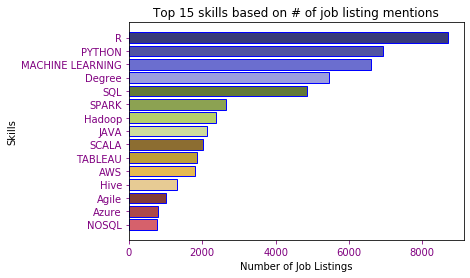

In [60]:

x_axis = top_15['skill']
total = top_15['TOTAL']

cs=cm.tab20b(np.arange(20)/20.)
plt.barh(x_axis, total, color =cs, edgecolor = 'blue')


#Set descriptions:
plt.title('Top 15 skills based on # of job listing mentions')
plt.xlabel('Number of Job Listings')
plt.ylabel('Skills')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='purple')
ax.tick_params(axis='y', colors='purple')
plt.gca().invert_yaxis()

plt.savefig("../images/top_15 skills.png")

plt.show()



In [61]:
junior_df=final_skills[final_skills['job_title']=="junior data scientist"]
mid_level_df=final_skills[final_skills['job_title']=="data scientist"]
senior_df=final_skills[final_skills['job_title']=="senior data scientist"]



In [62]:
jr_skills = junior_df.sum(axis=0)

jr_skills2 = pd.DataFrame(jr_skills) 

jr_skills2.drop(['job_title', 'job_board'])
jr_totals = jr_skills2.drop(jr_skills2.index[[0,1]])
jr_plot = jr_totals.reset_index()

jr_plot.columns.values[1] = 'total'

x = jr_plot.iloc[: , 1]


jr_plot['TOTAL'] = x



In [63]:
jr_skills2.drop(['job_title', 'job_board'])
jr_totals = jr_skills2.drop(jr_skills2.index[[0,1]])
jr_plot = jr_totals.reset_index()

jr_plot.columns.values[1] = 'total'

x = jr_plot.iloc[: , 1]


jr_plot['TOTAL'] = x


In [64]:
x = jr_plot['TOTAL'].values.tolist()
x_2 = x

jr_plot['TOTAL'] = x_2

jr_15 = jr_plot.nlargest(15,'TOTAL')


jr_15 = jr_15.drop('total', 1)


jr_15.head()

,index,TOTAL
1,R,364.0
22,PYTHON,300.0
6,Degree,265.0
13,MACHINE LEARNING,264.0
27,SQL,190.0


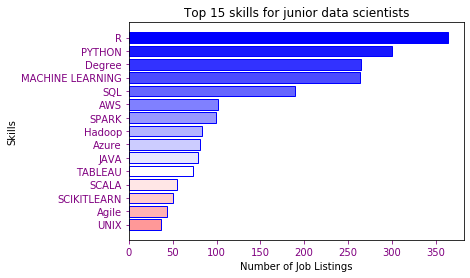

In [65]:
x_axis = jr_15['index']
total = jr_15['TOTAL']

cs=cm.bwr(np.arange(20)/20.)
plt.barh(x_axis, total, color =cs, edgecolor = 'blue')


#Set descriptions:
plt.title('Top 15 skills for junior data scientists')
plt.xlabel('Number of Job Listings')
plt.ylabel('Skills')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='purple')
ax.tick_params(axis='y', colors='purple')
plt.gca().invert_yaxis()

plt.savefig("../images/jr_top_15 skills.png")

plt.show()




In [66]:
mid_skills = mid_level_df.sum(axis=0)
mid_skills2 = pd.DataFrame(mid_skills) 

mid_skills2.drop(['job_title', 'job_board'])
mid_totals = mid_skills2.drop(mid_skills2.index[[0,1]])
mid_plot = mid_totals.reset_index()

mid_plot.columns.values[1] = 'total'

x = mid_plot.iloc[: , 1]


mid_plot['TOTAL'] = x


In [67]:
x = mid_plot['TOTAL'].values.tolist()
x_2 = x

mid_plot['TOTAL'] = x_2

mid_15 = mid_plot.nlargest(15,'TOTAL')


mid_15 = mid_15.drop('total', 1)


mid_15

,index,TOTAL
1,R,6288.0
22,PYTHON,4986.0
13,MACHINE LEARNING,4715.0
6,Degree,3923.0
27,SQL,3533.0
26,SPARK,1815.0
8,Hadoop,1670.0
11,JAVA,1526.0
25,SCALA,1407.0
29,TABLEAU,1326.0


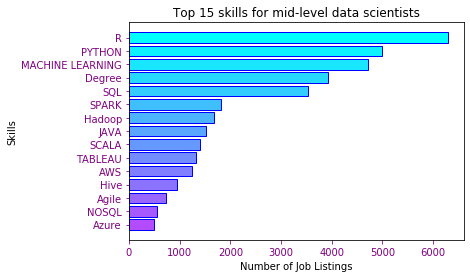

In [68]:
x_axis = mid_15['index']
total = mid_15['TOTAL']
cs=cm.cool(np.arange(20)/20.)

plt.barh(x_axis, total, color =cs, edgecolor = 'blue')


#Set descriptions:
plt.title('Top 15 skills for mid-level data scientists')
plt.xlabel('Number of Job Listings')
plt.ylabel('Skills')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='purple')
ax.tick_params(axis='y', colors='purple')
plt.gca().invert_yaxis()


plt.savefig("../images/mid_top_15 skills.png")

plt.show()


In [69]:
sr_skills = senior_df.sum(axis=0)
sr_skills2 = pd.DataFrame(sr_skills) 

sr_skills2.drop(['job_title', 'job_board'])
sr_totals = sr_skills2.drop(sr_skills2.index[[0,1]])
sr_plot = sr_totals.reset_index()

sr_plot.columns.values[1] = 'total'

x = sr_plot.iloc[: , 1]


sr_plot['TOTAL'] = x


In [70]:
x = sr_plot['TOTAL'].values.tolist()
x_2 = x

sr_plot['TOTAL'] = x_2

sr_15 = sr_plot.nlargest(15,'TOTAL')


sr_15 = sr_15.drop('total', 1)


sr_15.head()

,index,TOTAL
1,R,2047.0
22,PYTHON,1642.0
13,MACHINE LEARNING,1630.0
6,Degree,1259.0
27,SQL,1121.0


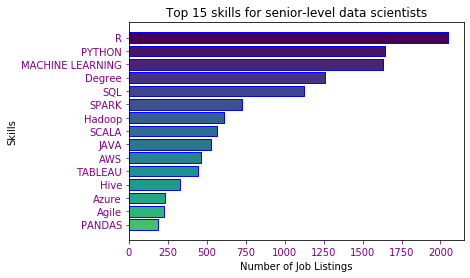

In [71]:
x_axis = sr_15['index']
total = sr_15['TOTAL']
cs=cm.viridis(np.arange(20)/20.)

plt.barh(x_axis, total, color =cs, edgecolor = 'blue')


#Set descriptions:
plt.title('Top 15 skills for senior-level data scientists')
plt.xlabel('Number of Job Listings')
plt.ylabel('Skills')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='purple')
ax.tick_params(axis='y', colors='purple')
plt.gca().invert_yaxis()
plt.savefig("../images/sr_top_15 skills.png")
plt.show()


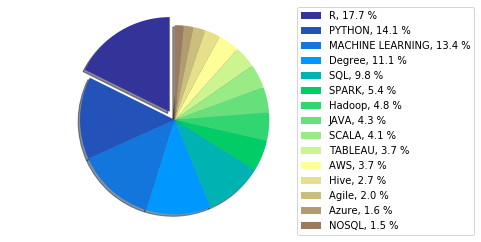

In [72]:



labels = top_15['skill']
sizes = top_15['TOTAL'] / top_15['TOTAL'].sum() * 100


cs=cm.terrain(np.arange(20)/20.)
explode = (0.1, 0,0,0,0,0,0,0,0,0,0,0,0,0,0)  
patches, texts = plt.pie(sizes, colors = cs, explode=explode, shadow=True, startangle=90)

plt.legend( loc = 'upper left', bbox_to_anchor=(0.85,1.025), labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, sizes)])


plt.axis('equal')
plt.savefig("../images/top_15_skills_pie.png")
plt.show()




In [73]:
count = 1
final_skills['count'] = count 


by_title = final_skills.groupby('job_title', as_index=False)['count', 'C#',
'R',
 'Agile',
 'AWS',
 'Azure',
 'DATA STUDIO',   
 'Degree',
 'GOLang',
 'Hadoop',
 'Hive',
 'INSIGHT',
 'JAVA',
 'KAFKA',
 'MACHINE LEARNING',             
 'MATLAB',
 'MATPLOTLIB',
 'NOSQL',
 'PANDAS',
 'PERL',
 'PIG',
 'POSTGRESQL',
 'POWERBI',
 'PYTHON',
 'QLIKVIEW',
 'R CLOUD',
 'SCALA',
 'SPARK',
 'SQL',
 'SCIKITLEARN',
 'TABLEAU',
 'UNIX'].sum()




by_title['job_total'] = len(by_title['job_title'])
by_title.head()

C:\Users\winyi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,job_title,count,C#,R,Agile,AWS,Azure,DATA STUDIO,Degree,GOLang,Hadoop,Hive,INSIGHT,JAVA,KAFKA,MACHINE LEARNING,MATLAB,MATPLOTLIB,NOSQL,PANDAS,PERL,PIG,POSTGRESQL,POWERBI,PYTHON,QLIKVIEW,R CLOUD,SCALA,SPARK,SQL,SCIKITLEARN,TABLEAU,UNIX,job_total
0,data scientist,6326,134.0,6288,738,1244,488,8.0,3923,8,1670,949,0.0,1526,291,4715,300,245,559,450,232,305,145,150,4986,140,183,1407,1815,3533,421,1326,263,3
1,junior data scientist,365,3.0,364,43,102,81,2.0,265,0,83,31,0.0,79,3,264,22,9,17,16,19,11,8,7,300,7,3,55,99,190,50,73,37,3
2,senior data scientist,2051,46.0,2047,228,464,234,6.0,1259,13,611,330,0.0,529,99,1630,101,48,184,188,100,121,17,31,1642,30,66,563,724,1121,144,446,94,3


In [74]:
#transpose columns and rows

by_title2 = by_title.T
by_title_final = by_title2.drop('count')


In [75]:
test = by_title.set_index('job_title').T
test2 = test.drop(['count'])

# get top 10 skills
test3 = test2.nlargest(10,'data scientist')




test3['skills'] = test3.index
test3['total'] = test3['data scientist'] +test3['junior data scientist'] +test3['senior data scientist']

#test3.to_csv('nested_pie.csv')

In [76]:
#get data for inner plot of nested pie

test3
test4 = test3[['junior data scientist', 'data scientist','senior data scientist']]

test4.rename(columns={'junior data scientist': 'total_jr', 'data scientist': 'total_mid', 'senior data scientist':'total_sr'}, inplace=True)

test5 = test4.to_numpy()
test5.tolist()

test4['skills'] = test4.index

skills = test4['skills']

Row_list =[] 
  
 # Iterate over each row 
for index, rows in test4.iterrows(): 
# Create list for the current row 
     my_list =[rows.total_jr, rows.total_mid,rows.total_sr] 
      
# append the list to the final list 
     Row_list.append(my_list) 
  





pie_list=[]
for l in Row_list:
       pie_list +=l
    
print(pie_list)

[364.0, 6288.0, 2047.0, 300.0, 4986.0, 1642.0, 264.0, 4715.0, 1630.0, 265.0, 3923.0, 1259.0, 190.0, 3533.0, 1121.0, 99.0, 1815.0, 724.0, 83.0, 1670.0, 611.0, 79.0, 1526.0, 529.0, 55.0, 1407.0, 563.0, 73.0, 1326.0, 446.0]


C:\Users\winyi\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\winyi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


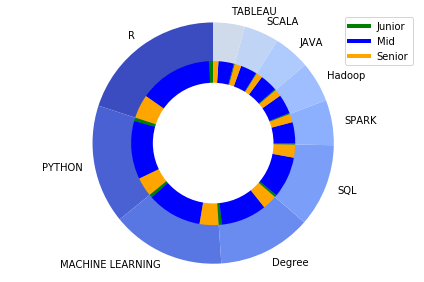

In [77]:
# Data to plot
labels = test3['skills']
sizes = test3['total']
x = 'Jr'
y = 'Mid'
z = 'Sr'



sizes2 = pie_list

labels_2 = [x,y,z]

colors2 = ['green', 'blue', 'orange']
#custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]

cs2 = cm.coolwarm(np.arange(20)/20.)
# Plot
plt.pie(sizes, labels=labels, colors=cs2, startangle=90,frame=True)
plt.pie(sizes2,colors=colors2, radius=0.68,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(custom_lines, ['Junior', 'Mid', 'Senior'])

# plt.legend([sizes, line_down], ['Line Up', 'Line Down'])
plt.axis('equal')
plt.tight_layout()

plt.savefig("../images/nested_pie2.png")
plt.show()